In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
print(os.listdir("../input"))

['WorldCups.csv', 'WorldCupMatches.csv', 'WorldCupPlayers.csv']


In [2]:
matches = pd.read_csv('../input/WorldCupMatches.csv')
wcups = pd.read_csv('../input/WorldCups.csv')
players = pd.read_csv('../input/WorldCupPlayers.csv')

In [3]:
match = matches.dropna()
match.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [4]:
match.loc[match['Attendance']== max(match['Attendance'])] 

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
74,1950.0,16 Jul 1950 - 15:00,Group 6,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Uruguay,2.0,1.0,Brazil,,173850.0,0.0,0.0,READER George (ENG),ELLIS Arthur (ENG),MITCHELL George (SCO),209.0,1190.0,URU,BRA


The match played between Uruguay and Brazil on 16th July 1950 at Rio De Janeiro has the record for the largest attendance at a world cup match. Officially **1,73,850** spectators crammed into Rio de Janeiro’s Maracanã Stadium but the result was a national nightmare as Brazil lost to Uruguay.

In [5]:
match.loc[match['Attendance']== min(match['Attendance'])] 

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
9,1930.0,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1.0,0.0,France,,2000.0,0.0,0.0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201.0,1094.0,CHI,FRA


The match played between Chile and France on 19th July 1930 at Montevideo is the least attended match in the Fifa world cup history with only **2000** official spectators.

In [6]:
match['City'].value_counts().head() 

Mexico City        23
Rio De Janeiro     18
Montevideo         18
Guadalajara        17
Johannesburg       15
Name: City, dtype: int64

In [7]:
match['Stadium'].value_counts().head()

Estadio Azteca             19
Olympiastadion             14
Jalisco                    14
Nou Camp - Estadio Le�n    11
Estadio do Maracana        10
Name: Stadium, dtype: int64

**Mexico city** has hosted the maximum number of world cup matches followed by Montevideo and Rio De Janeiro. The **Estadio Azteca** stadium of Mexico city has hosted most number of world cup matches.

# Attendance with each passing year

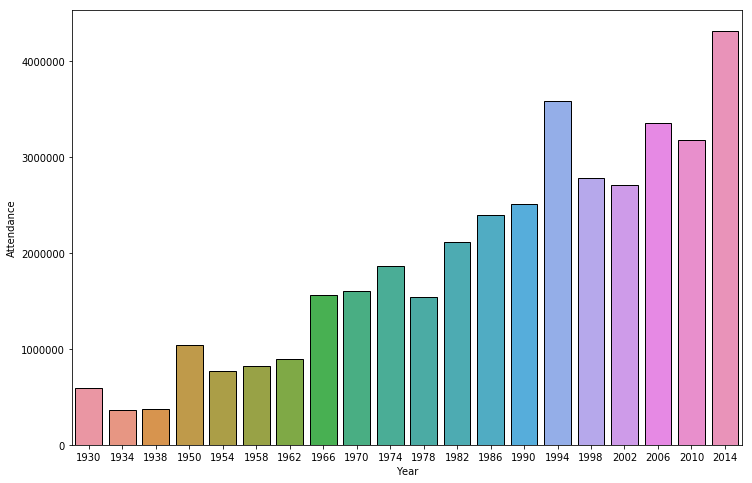

In [8]:
A = match.groupby('Year')['Attendance'].sum().reset_index()
A['Year']=A['Year'].astype(int)

plt.figure(figsize=(12,8))
sns.barplot(y =A['Attendance'],x = A['Year'],edgecolor="k"*len(A))
plt.show()

# Average attendance per year

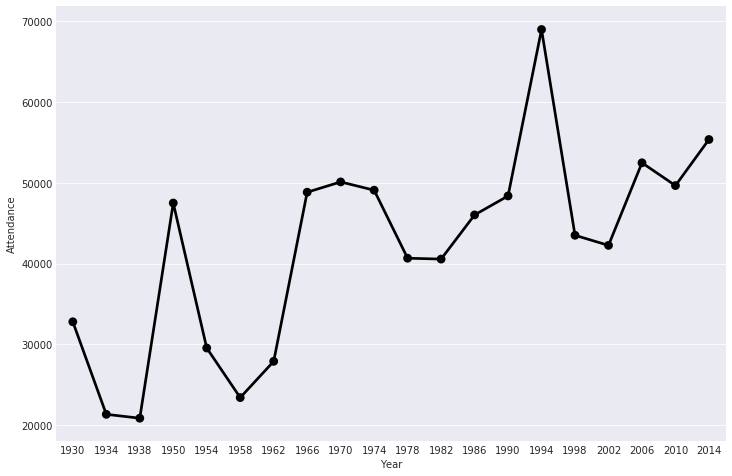

In [9]:
Avg = match.groupby('Year')['Attendance'].mean().reset_index()
Avg['Year'] = Avg['Year'].astype(int)

sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
sns.pointplot('Year','Attendance',data=Avg,color='black')
plt.show()

In [10]:
Go = abs(match['Home Team Goals'] - match['Away Team Goals'])
match = match.assign(Goal_diff= Go)
match.loc[match['Goal_diff'] == max(match['Goal_diff'])]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Goal_diff
80,1954.0,17 Jun 1954 - 18:00,Group 2,Hardturm,Zurich,Hungary,9.0,0.0,Korea Republic,,13000.0,4.0,0.0,VINCENTI Raymond (FRA),VON GUNTER Albert (SUI),STEINER Carl (AUT),211.0,1294.0,HUN,KOR,9.0
243,1974.0,18 Jun 1974 - 19:30,Group 2,Parkstadion,Gelsenkirchen,Yugoslavia,9.0,0.0,Zaire,,31700.0,6.0,0.0,DELGADO Omar (COL),LLOBREGAT Vicente (VEN),BARRETO RUIZ Ramon (URU),262.0,2186.0,YUG,ZAI,9.0
312,1982.0,15 Jun 1982 - 21:00,Group 3,Nuevo Estadio,Elche,Hungary,10.0,1.0,El Salvador,,23000.0,3.0,0.0,AL DOY Ebrahim (BHR),CORVER Charles (NED),LUND-SORENSEN Henning (DEN),293.0,896.0,HUN,SLV,9.0


The maximum goal difference in a world cup match is 9 goals and there are three matches in the world cup history where the winning team ruined the loosing team. **Hungary** has done that against Korea Republic and El Salvador. Though it is irrelevant but all the winning teams were home teams in those matches.

In [11]:
match['Referee'].value_counts().head()

Ravshan IRMATOV (UZB)     10
QUINIOU Joel (FRA)         8
ARCHUNDIA Benito (MEX)     8
RODRIGUEZ Marco (MEX)      8
LARRIONDA Jorge (URU)      8
Name: Referee, dtype: int64

**Ravshan Irmatov** of Uzbekistan holds the record for officiating the most FIFA World Cup matches.

In [12]:
wcups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


# Goals scored per year

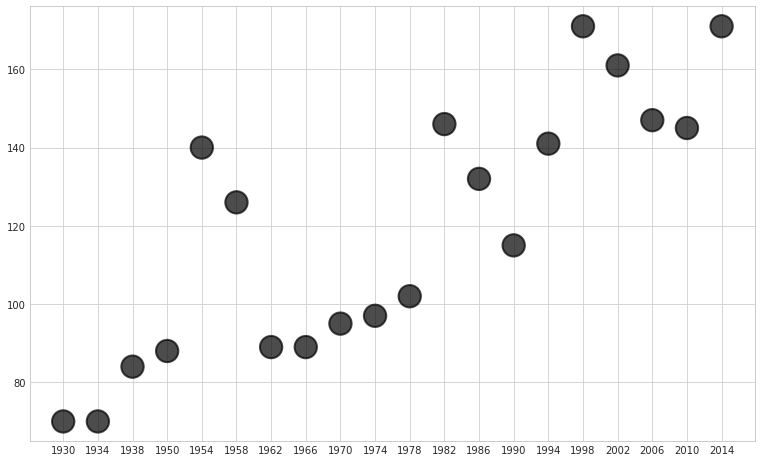

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(13,8))
wcups["Year"] = wcups["Year"].astype(str)
plt.scatter(y =wcups['GoalsScored'],x = wcups['Year'],edgecolor="k"*len(A),alpha=.7,linewidth=2,s=500,color='black')
plt.xticks(wcups["Year"].unique())
plt.show()

# Matches played per year

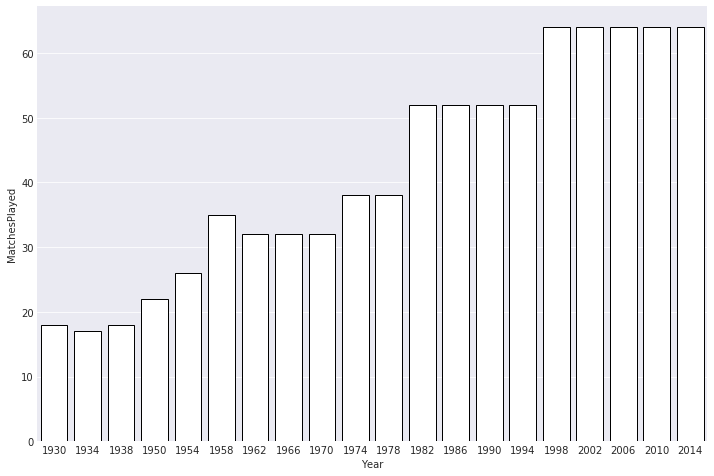

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
sns.barplot(y='MatchesPlayed',x ='Year',data=wcups,color='white',edgecolor="k"*len(wcups))